# Used cars data cleaning

## Importing relevan libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [7]:
# Importing the data frame from a csv file and showing it's 5 first lines to understand the data
raw_data = pd.read_csv('../Data/car_values_raw.csv')
display(raw_data.head())
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Cleaning data

In [9]:
# Drop unusefull columns for model
data = raw_data.drop(['Model'],axis=1)
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
# Deleting entrys with missing values
data.dropna(axis=0,inplace=True)

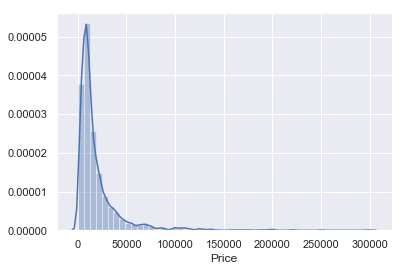

In [12]:
# Plotting feature distribution
sns.distplot(data['Price'])

In [38]:
# The distribution clearly shows significan outliers in the upper range

# We create a function to delete outliers based on quantiles
def del_outliers(df, col, quant=0.99):
    if quant > 0.75:
        q = df[col].quantile(quant)
        df_clean = df[df[col]<q]
        return df_clean
    elif quant < 0.25:
        q = df[col].quantile(quant)
        df_clean = df[df[col]>q]
        return df_clean
    else:
        print('No outliers deleted. Review quantile range')
        return df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3823,3823.000000,3823,3823.000000,3823.000000,3823,3823,3823.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,872,NaN,1491,NaN,NaN,1740,3452,NaN
mean,NaN,14911.796798,NaN,171.095998,2.715250,NaN,NaN,2005.934868
std,NaN,12198.369515,NaN,99.269432,5.052605,NaN,NaN,6.565549
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,163.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,19150.000000,NaN,234.000000,3.000000,NaN,NaN,2011.000000


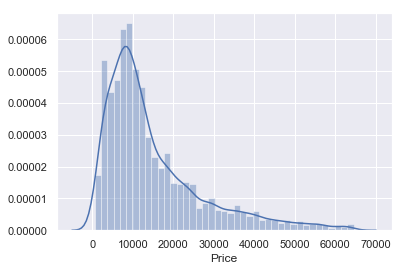

In [26]:
data_1 = del_outliers(data, 'Price', 0.95)
# In this way we have essentially removed the top 5% of the data about 'Price'
display(data_1.describe(include='all'))
sns.distplot(data_1['Price'])

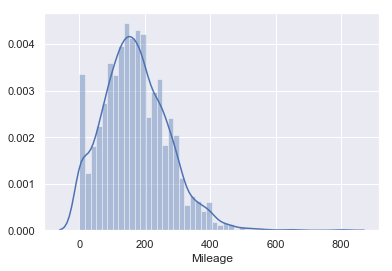

In [19]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_1['Mileage'])

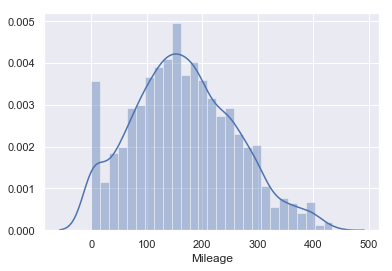

In [28]:

data_2 = del_outliers(data_1, 'Mileage', 0.99)
sns.distplot(data_2['Mileage'])

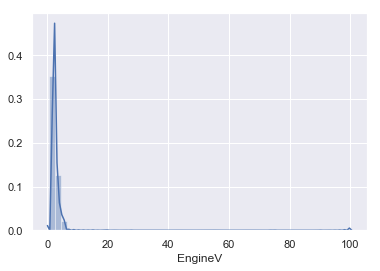

In [30]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_2['EngineV'])

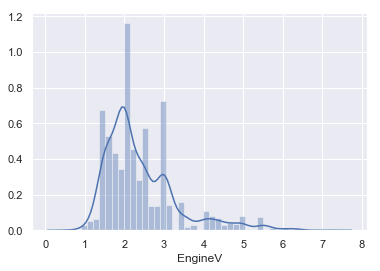

In [32]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 8l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<8]
sns.distplot(data_3['EngineV'])

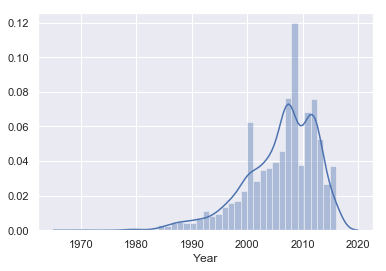

In [35]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_3['Year'])

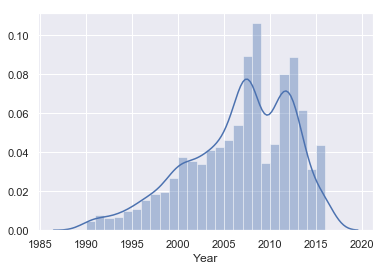

In [39]:
data_4 = del_outliers(data_3, 'Year', 0.02)
sns.distplot(data_4['Year'])

In [41]:
data_cleaned = data_4.reset_index(drop=True)
display(data_cleaned.describe(include='all'))
data_cleaned.to_csv('../Data/car_values_clean.csv')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3670,3670.000000,3670,3670.000000,3670.000000,3670,3670,3670.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,829,NaN,1406,NaN,NaN,1687,3309,NaN
mean,NaN,15343.443681,NaN,165.925886,2.414215,NaN,NaN,2006.552044
std,NaN,12211.401894,NaN,91.649120,0.928242,NaN,NaN,5.720280
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1990.000000
25%,NaN,7200.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11300.000000,NaN,160.000000,2.140000,NaN,NaN,2007.000000
75%,NaN,19900.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000
